In [1]:
using Plots
using StatsBase

In [2]:
n = 1
m = 1000

1000

In [3]:
function random_walks(n,p)
a = [zeros(1)]
for i=2:n
    b = copy(a[end]);
    b[1] +=sample([-1 1],weights([1-p p]))
    push!(a, b)
end
a = hcat(a...)
return transpose(a)
end

random_walks (generic function with 1 method)

In [12]:
@time begin

m=1000000
n=100
p=0.5
 
origin_data = zeros(m)

for i in 1:m
    walk=random_walks(n,p)
    time_ratio=max(sum(walk[:].>=0),sum(walk[:].>=0))/n
    origin_data[i]=time_ratio
    #origin_data[i]=new_get_interval(time_ratio,splitting)
end
    
end

 33.817302 seconds (622.00 M allocations: 44.443 GiB, 18.35% gc time)


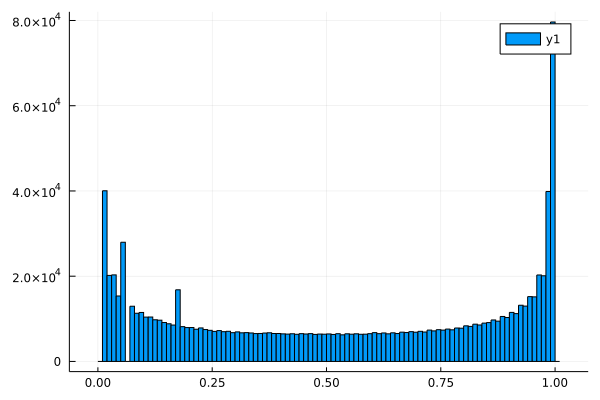

In [13]:
splitting=100

intervals=zeros(splitting+2)

for i in 2:splitting+2
    intervals[i]+=(intervals[i-1]+1/(splitting))
end

histogram(origin_data, bins=intervals)


In [9]:
m=100
p=0.5

a=[.0]

for i in 2:m
    b = random_walks(i,p)[i-1]/i
    push!(a, b)
end
print(a)

[0.0, 0.0, 0.3333333333333333, 0.0, 0.6, 0.6666666666666666, 0.14285714285714285, 0.0, -0.3333333333333333, 0.0, 0.45454545454545453, -0.5, -0.07692307692307693, -0.14285714285714285, 0.06666666666666667, 0.125, -0.058823529411764705, -0.2222222222222222, 0.05263157894736842, 0.1, -0.14285714285714285, -0.18181818181818182, 0.13043478260869565, 0.16666666666666666, 0.2, 0.0, 0.25925925925925924, -0.07142857142857142, 0.10344827586206896, 0.0, 0.16129032258064516, 0.0625, 0.15151515151515152, 0.0, 0.2571428571428571, 0.1111111111111111, 0.08108108108108109, 0.10526315789473684, -0.07692307692307693, 0.1, -0.024390243902439025, -0.19047619047619047, -0.16279069767441862, 0.09090909090909091, 0.06666666666666667, 0.08695652173913043, 0.19148936170212766, 0.0, -0.2653061224489796, -0.12, -0.058823529411764705, -0.07692307692307693, -0.20754716981132076, 0.037037037037037035, -0.23636363636363636, 0.07142857142857142, 0.19298245614035087, 0.034482758620689655, 0.15254237288135594, 0.1333333

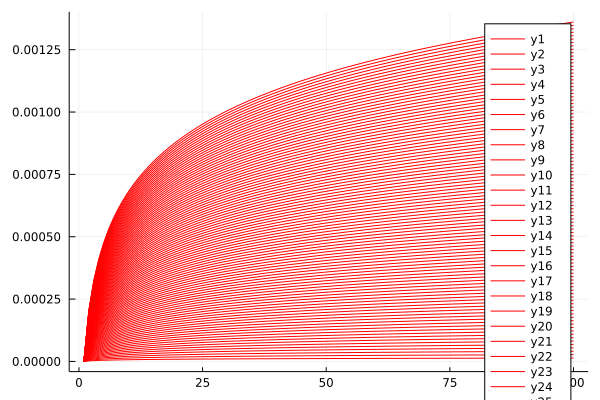

In [100]:
boundaries=[1:m]
boundaries=(x->log.(x)).(boundaries)
boundaries=(x->)
#plot((x->sqrt.(x)).(((x->log.(x)).(boundaries))/boundaries),color="black")
#plot((x->sqrt.(x)).(((x->log.(x)).(boundaries))/boundaries),color="black")
plot(boundaries,color="red")

In [86]:
(x->log.(x)).([1:3])

LoadError: MethodError: no method matching log(::UnitRange{Int64})
[0mClosest candidates are:
[0m  log([91m::StridedMatrix{T} where T[39m) at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\LinearAlgebra\src\dense.jl:712
[0m  log([91m::LinearAlgebra.LowerTriangular[39m) at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\LinearAlgebra\src\triangular.jl:1953
[0m  log([91m::LinearAlgebra.UniformScaling[39m) at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\LinearAlgebra\src\uniformscaling.jl:174
[0m  ...

In [89]:
?sqrt


search: sqrt isqrt



```
sqrt(x)
```

Return $\sqrt{x}$. Throws [`DomainError`](@ref) for negative [`Real`](@ref) arguments. Use complex negative arguments instead. The prefix operator `√` is equivalent to `sqrt`.

# Examples

```jldoctest; filter = r"Stacktrace:(\n \[[0-9]+\].*)*"
julia> sqrt(big(81))
9.0

julia> sqrt(big(-81))
ERROR: DomainError with -81.0:
NaN result for non-NaN input.
Stacktrace:
 [1] sqrt(::BigFloat) at ./mpfr.jl:501
[...]

julia> sqrt(big(complex(-81)))
0.0 + 9.0im
```

---

```
sqrt(A::AbstractMatrix)
```

If `A` has no negative real eigenvalues, compute the principal matrix square root of `A`, that is the unique matrix $X$ with eigenvalues having positive real part such that $X^2 = A$. Otherwise, a nonprincipal square root is returned.

If `A` is real-symmetric or Hermitian, its eigendecomposition ([`eigen`](@ref)) is used to compute the square root.   For such matrices, eigenvalues λ that appear to be slightly negative due to roundoff errors are treated as if they were zero More precisely, matrices with all eigenvalues `≥ -rtol*(max |λ|)` are treated as semidefinite (yielding a Hermitian square root), with negative eigenvalues taken to be zero. `rtol` is a keyword argument to `sqrt` (in the Hermitian/real-symmetric case only) that defaults to machine precision scaled by `size(A,1)`.

Otherwise, the square root is determined by means of the Björck-Hammarling method [^BH83], which computes the complex Schur form ([`schur`](@ref)) and then the complex square root of the triangular factor.

[^BH83]: Åke Björck and Sven Hammarling, "A Schur method for the square root of a matrix", Linear Algebra and its Applications, 52-53, 1983, 127-140. [doi:10.1016/0024-3795(83)80010-X](https://doi.org/10.1016/0024-3795(83)80010-X)

# Examples

```jldoctest
julia> A = [4 0; 0 4]
2×2 Matrix{Int64}:
 4  0
 0  4

julia> sqrt(A)
2×2 Matrix{Float64}:
 2.0  0.0
 0.0  2.0
```


In [74]:
?log



search: log log2 log1p log10 loglikelihood Clong Clonglong Culong Culonglong



```
log(b,x)
```

Compute the base `b` logarithm of `x`. Throws [`DomainError`](@ref) for negative [`Real`](@ref) arguments.

# Examples

```jldoctest; filter = r"Stacktrace:(\n \[[0-9]+\].*)*"
julia> log(4,8)
1.5

julia> log(4,2)
0.5

julia> log(-2, 3)
ERROR: DomainError with -2.0:
log will only return a complex result if called with a complex argument. Try log(Complex(x)).
Stacktrace:
 [1] throw_complex_domainerror(::Symbol, ::Float64) at ./math.jl:31
[...]

julia> log(2, -3)
ERROR: DomainError with -3.0:
log will only return a complex result if called with a complex argument. Try log(Complex(x)).
Stacktrace:
 [1] throw_complex_domainerror(::Symbol, ::Float64) at ./math.jl:31
[...]
```

!!! note
    If `b` is a power of 2 or 10, [`log2`](@ref) or [`log10`](@ref) should be used, as these will typically be faster and more accurate. For example,

    ```jldoctest
    julia> log(100,1000000)
    2.9999999999999996

    julia> log10(1000000)/2
    3.0
    ```


---

```
log(x)
```

Compute the natural logarithm of `x`. Throws [`DomainError`](@ref) for negative [`Real`](@ref) arguments. Use complex negative arguments to obtain complex results.

# Examples

```jldoctest; filter = r"Stacktrace:(\n \[[0-9]+\].*)*"
julia> log(2)
0.6931471805599453

julia> log(-3)
ERROR: DomainError with -3.0:
log will only return a complex result if called with a complex argument. Try log(Complex(x)).
Stacktrace:
 [1] throw_complex_domainerror(::Symbol, ::Float64) at ./math.jl:31
[...]
```

---

```
log(A{T}::StridedMatrix{T})
```

If `A` has no negative real eigenvalue, compute the principal matrix logarithm of `A`, i.e. the unique matrix $X$ such that $e^X = A$ and $-\pi < Im(\lambda) < \pi$ for all the eigenvalues $\lambda$ of $X$. If `A` has nonpositive eigenvalues, a nonprincipal matrix function is returned whenever possible.

If `A` is symmetric or Hermitian, its eigendecomposition ([`eigen`](@ref)) is used, if `A` is triangular an improved version of the inverse scaling and squaring method is employed (see [^AH12] and [^AHR13]). For general matrices, the complex Schur form ([`schur`](@ref)) is computed and the triangular algorithm is used on the triangular factor.

[^AH12]: Awad H. Al-Mohy and Nicholas J. Higham, "Improved inverse  scaling and squaring algorithms for the matrix logarithm", SIAM Journal on Scientific Computing, 34(4), 2012, C153-C169. [doi:10.1137/110852553](https://doi.org/10.1137/110852553)

[^AHR13]: Awad H. Al-Mohy, Nicholas J. Higham and Samuel D. Relton, "Computing the Fréchet derivative of the matrix logarithm and estimating the condition number", SIAM Journal on Scientific Computing, 35(4), 2013, C394-C410. [doi:10.1137/120885991](https://doi.org/10.1137/120885991)

# Examples

```jldoctest
julia> A = Matrix(2.7182818*I, 2, 2)
2×2 Matrix{Float64}:
 2.71828  0.0
 0.0      2.71828

julia> log(A)
2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0
```
